In [3]:
#Instalación de paquetes
!pip install scikit-image
!pip install nbconvert
!pip install jupyter-cjk-xelatex

  Running setup.py bdist_wheel for jupyter-cjk-xelatex ... error
  Complete output from command /home/jorgektch/Projects/eliminacion-de-artefactos-impulsivos-en-una-imagen-env/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-4n_m9l0p/jupyter-cjk-xelatex/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmpc5cmhzthpip-wheel- --python-tag cp36:
  usage: -c [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
     or: -c --help [cmd1 cmd2 ...]
     or: -c --help-commands
     or: -c cmd --help
  
  error: invalid command 'bdist_wheel'
  
  ----------------------------------------
  Failed building wheel for jupyter-cjk-xelatex
  Running setup.py clean for jupyter-cjk-xelatex
Failed to build jupyter-cjk-xelatex
  Running setup.py install for jupyter-cjk-xelatex ... done


In [2]:
import random
from PIL import Image

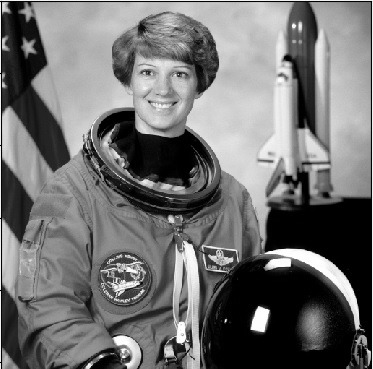

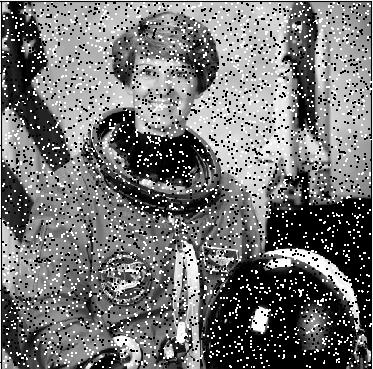

In [4]:
#Funcion que agrega ruido a la imagen original
def ruido(imagen, porcentaje):

	tamano = imagen.size[0]*imagen.size[1]
	auxiliar = (tamano*porcentaje)//800
	if imagen.mode == 'RGB':
		dato_minimo = (0, 0, 0)
		dato_maximo = (255, 255, 255)

	elif imagen.mode == 'L':
		dato_minimo = 0
		dato_maximo = 255

	#pixeles blancos
	for x in range(auxiliar):
		coordenada_x = random.randrange(2, imagen.width-2)
		coordenada_y = random.randrange(2, imagen.height-2)

		imagen.putpixel((coordenada_x, coordenada_y), dato_maximo)
		imagen.putpixel((coordenada_x+1, coordenada_y), dato_maximo)
		imagen.putpixel((coordenada_x, coordenada_y+1), dato_maximo)
		imagen.putpixel((coordenada_x+1, coordenada_y+1), dato_maximo)

	#pixeles negros
	for x in range(auxiliar):
		coordenada_x = random.randrange(2, imagen.width-2)
		coordenada_y = random.randrange(2, imagen.height-2)

		imagen.putpixel((coordenada_x, coordenada_y), dato_minimo)
		imagen.putpixel((coordenada_x+1, coordenada_y), dato_minimo)
		imagen.putpixel((coordenada_x, coordenada_y+1), dato_minimo)
		imagen.putpixel((coordenada_x+1, coordenada_y+1), dato_minimo)

	return None

foto = Image.open('img/astronauta.jpg')
display(foto)

#llamado a la funcion pasando como parametro la imagen y el
#porcentaje de ruido deseado
ruido(foto, 20)

foto.save('img/astronauta2.jpg')
foto2 = Image.open('img/astronauta2.jpg')

display(foto2)

foto.close()

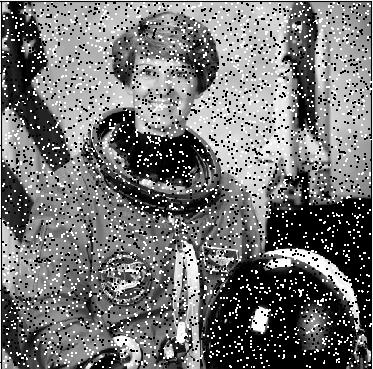

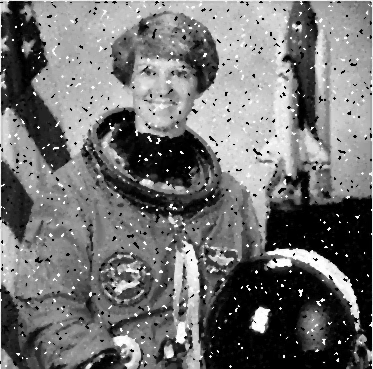

In [5]:
from PIL import Image, ImageFilter

#abre la imagen original en el entorno de python

foto2 = Image.open('img/astronauta2.jpg')
display(foto2)

tamano = 3 #3x3

foto3 = foto2.filter(ImageFilter.MedianFilter(tamano))

#se guarda el resultado

foto3.save('img/astronauta3.jpg')
display(foto3)

#se cierran ambos objetos creados de la clase Image

foto2.close()

foto3.close()

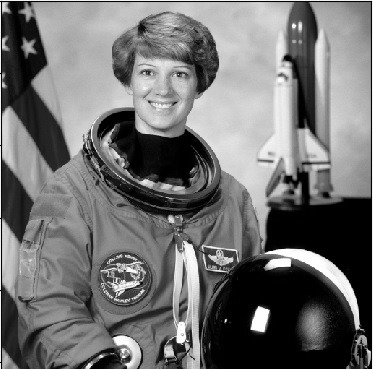

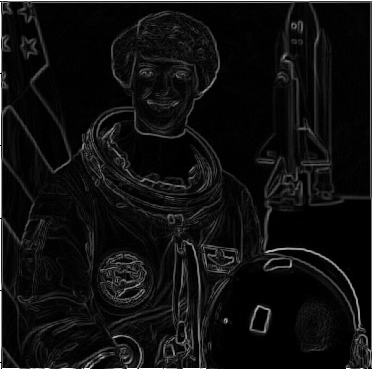

In [6]:
import sys
from PIL import Image, ImageFilter

def detector_bordes(tipo):

	if tipo == 'Prewitt':

		factor = 6

		coeficientes_h = [-1, 0, 1, -1, 0, 1, -1, 0, 1]
		coeficientes_v = [-1, -1, -1, 0, 0, 0, 1, 1, 1]

		#coeficientes con signo contrario
		coeficientes_h1 = [1, 0, -1, 2, 0, -2, 1, 0, -1]
		coeficientes_v1 = [1, 2, 1, 0, 0, 0, -1, -2, -1]

	elif tipo == 'Sobel':

		factor = 8

		coeficientes_h = [-1, 0, 1, -2, 0, 2, -1, 0, 1]
		coeficientes_v = [-1, -2, -1, 0, 0, 0, 1, 2, 1]

		#coeficientes con signo contrario
		coeficientes_h1 = [1, 0, -1, 2, 0, -2, 1, 0, -1]
		coeficientes_v1 = [1, 2, 1, 0, 0, 0, -1, -2, -1]

	else:
		#en caso de no introducir el nombre correctamente se cierra el script
		sys.exit(0)

	datos_h = foto.filter(ImageFilter.Kernel((3,3), coeficientes_h, factor)).getdata()
	datos_v = foto.filter(ImageFilter.Kernel((3,3), coeficientes_v, factor)).getdata()

	datos= []

	for x in range(len(datos_h)):

		datos.append(round(((datos_h[x] ** 2) + (datos_v[x] ** 2)) ** 0.5))

	datos_h = foto.filter(ImageFilter.Kernel((3,3), coeficientes_h1, factor)).getdata()
	datos_v = foto.filter(ImageFilter.Kernel((3,3), coeficientes_v1, factor)).getdata()

	datos_signo_contrario = []

	for x in range(len(datos_h)):

		datos_signo_contrario.append(round(((datos_h[x] ** 2) + (datos_v[x] ** 2)) ** 0.5))

	datos_bordes = []

	for x in range(len(datos_h)):

		datos_bordes.append(datos[x] + datos_signo_contrario[x])

	return datos_bordes 

#apertura de la foto original
foto = Image.open('img/astronauta.jpg').convert('L')
display(foto)
datos_bordes = detector_bordes('Prewitt') 

#linea para hacer la deteccion con Sobel:
#datos_bordes = detector_bordes('Sobel')

foto4 = Image.new('L', foto.size)
foto4.putdata(datos_bordes)

#guardar el resultado
foto4.save('img/astronauta4.jpg')
display(foto4)
#cerrar los objetos de la clase Image
foto.close()
foto4.close()